In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./datasets/RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [7]:
df.isna().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [4]:
df1 = df.dropna()

In [11]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [5]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [6]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [7]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<AxesSubplot:xlabel='date'>

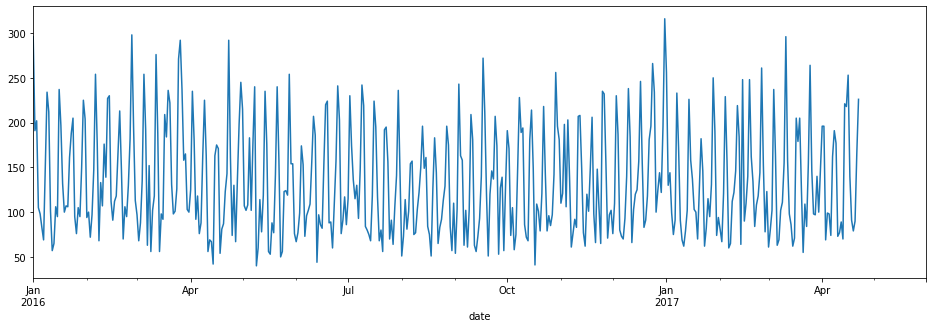

In [15]:
df['total'].plot(figsize=(16, 5))

In [16]:
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [17]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

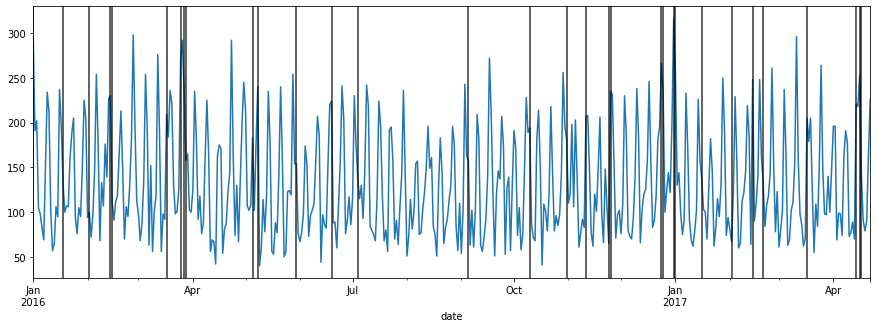

In [8]:
ax = df1['total'].plot(figsize=(15, 5))

for day in df1.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.8)

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

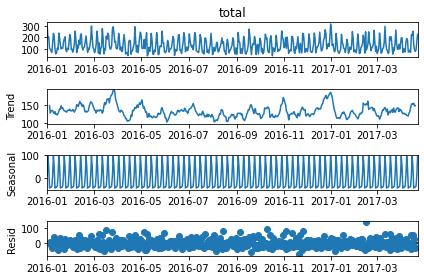

In [10]:
result = seasonal_decompose(df1['total'])
result.plot();

<AxesSubplot:xlabel='date'>

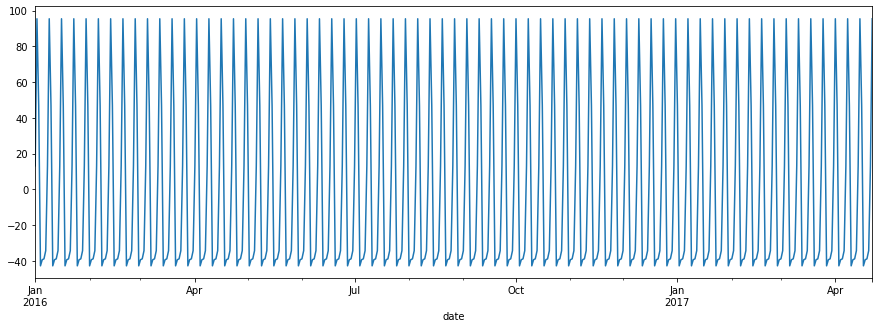

In [28]:
result.seasonal.plot(figsize=(15, 5))

In [12]:
from pmdarima import auto_arima

In [34]:
auto_arima(df1['total'], seasonal=True, m=7).summary()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceW

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2390.683
Date:                   Thu, 11 Feb 2021   AIC                           4789.366
Time:                           12:51:17   BIC                           4806.044
Sample:                                0   HQIC                          4795.923
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.5642      2.197      2.988      0.003       2.258      10.870
ar.S.L7        0.9475      0.017     56.314      0.000       0.914       0.980
ma.S.L7       -0.6933      0.057    -12.058      0.000      -0.806      -0.581
sigma2      1383.1413     92.206     15.001      0.000    1202.421    1563.861
===================================================================================
Ljung-Box (Q):                       73.32   Jarque-Bera (JB):                54.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.70
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
len(df1)

478

In [43]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
model = SARIMAX(train['total'],
                seasonal_order=(1, 0, 1, 7),
                enforce_invertibility=False)

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [39]:
results = model.fit()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2155.514
Date:                             Thu, 11 Feb 2021   AIC                           4319.027
Time:                                     12:58:22   BIC                           4335.338
Sample:                                 01-01-2016   HQIC                          4325.464
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2192      0.043      5.081      0.000       0.135       0.304
ar.S.L7        0.9999      0.000   8166.891      0.000       1.000       1.000
ma.S.L7       -0.9404      0.023    -40.175      0.000      -0.986      -0.894
sigma2      1064.3093     53.879     19.754      0.000     958.709    1169.910
===================================================================================
Ljung-Box (Q):                       30.74   Jarque-Bera (JB):               106.84
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.77
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
start = len(train)
end = len(train) + len(test) - 1

In [45]:
predictions = results.predict(start, end).rename('SARIMA Model')

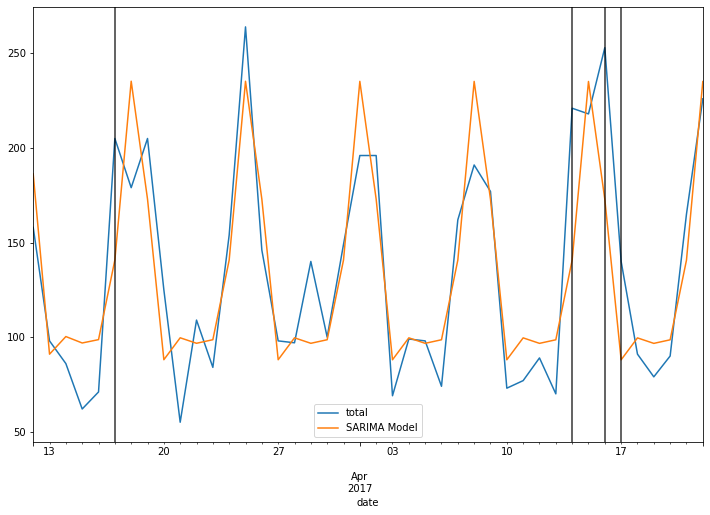

In [52]:
ax = test['total'].plot(figsize=(12, 8), legend=True)
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.8)

In [53]:
from statsmodels.tools.eval_measures import rmse

In [54]:
rmse(test['total'], predictions)

31.973281839453097

In [55]:
test['total'].mean()

134.26190476190476

**Exogenous**

In [14]:
df1[['holiday']]

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2017-04-18,0
2017-04-19,0
2017-04-20,0


In [16]:
auto_arima(df1['total'], exogenous=df1[['holiday']], seasonal=True, m=7).summary()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency i

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, [], 7)   Log Likelihood               -2348.688
Date:                            Fri, 12 Feb 2021   AIC                           4709.376
Time:                                    14:32:05   BIC                           4734.394
Sample:                                01-01-2016   HQIC                          4719.212
                                     - 04-22-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5611      4.273      2.706      0.007       3.186      19.936
holiday       74.8521      4.547     16.463      0.000      65.941      83.763
ma.L1          0.1782      0.051      3.475      0.001       0.078       0.279
ar.S.L7        0.5057      0.045     11.226      0.000       0.417       0.594
ar.S.L14       0.3842      0.043      8.979      0.000       0.300       0.468
sigma2      1142.1551     80.207     14.240      0.000     984.951    1299.359
===================================================================================
Ljung-Box (Q):                       85.01   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [18]:
model = SARIMAX(train['total'],
                exog=train[['holiday']],
                order=(0, 0, 1),
                seasonal_order=(2, 0, 1, 7),
                enforce_invertibility=False)

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [19]:
result = model.fit()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(2, 0, 1, 7)   Log Likelihood               -2173.204
Date:                           Fri, 12 Feb 2021   AIC                           4358.408
Time:                                   14:34:50   BIC                           4382.874
Sample:                               01-01-2016   HQIC                          4368.064
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       84.4961      3.960     21.337      0.000      76.734      92.258
ma.L1          0.0683      0.050      1.365      0.172      -0.030       0.166
ar.S.L7        0.6159      0.105      5.882      0.000       0.411       0.821
ar.S.L14       0.3740      0.103      3.629      0.000       0.172       0.576
ma.S.L7       60.2351    408.104      0.148      0.883    -739.635     860.105
sigma2         0.2977      4.038      0.074      0.941      -7.616       8.212
===================================================================================
Ljung-Box (Q):                      100.55   Jarque-Bera (JB):                 2.66
Prob(Q):                              0.00   Prob(JB):                         0.27
Heteroskedasticity (H):               0.99   Skew:                             0.02
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
start = len(train)
end = len(train) + len(test) - 1

In [22]:
predictions = result.predict(start, end, exog=test[['holiday']]).rename('SARIMAX with Exog')

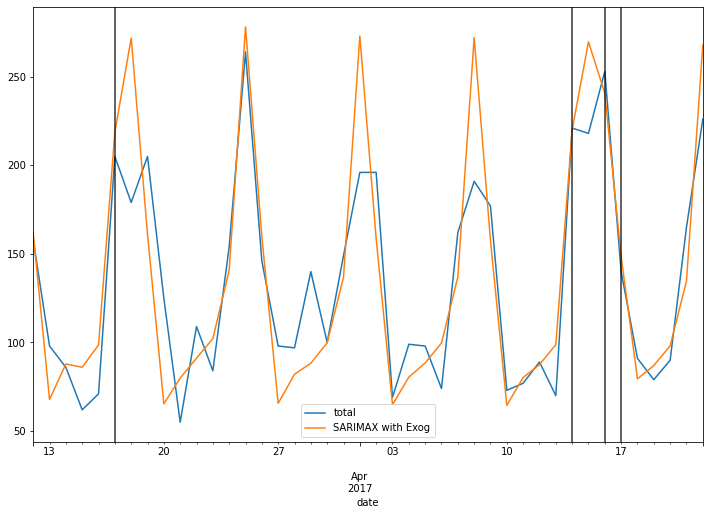

In [23]:
ax = test['total'].plot(figsize=(12, 8), legend=True)
predictions.plot(legend=True)

for day in test.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.8)

In [25]:
from statsmodels.tools.eval_measures import rmse

In [26]:
rmse(test['total'], predictions)

32.82116303526393

In [27]:
model = SARIMAX(df1['total'],
                exog=df1[['holiday']],
                order=(0, 0, 1),
                seasonal_order=(2, 0, 1, 7),
                enforce_invertibility=False)

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
result = model.fit()

D:\anaconda\envs\mlearning\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [32]:
exog_forecast = df[478:][['holiday']]

In [33]:
fcast = result.predict(len(df1), len(df1)+38, exog=exog_forecast).rename('Final SARIMAX Forecast')

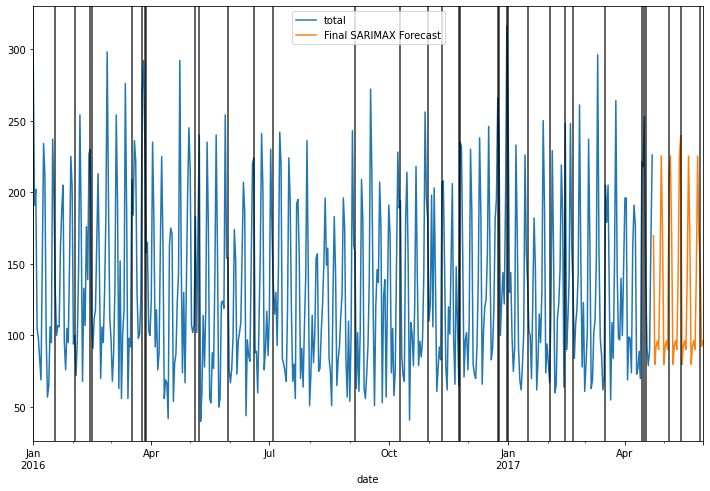

In [35]:
ax = df1['total'].plot(figsize=(12, 8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.8)

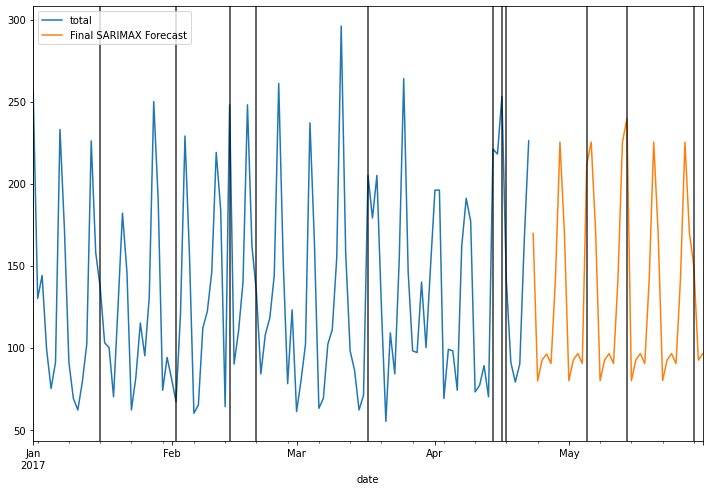

In [36]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(12, 8), legend=True)
fcast.plot(legend=True)

for day in df.query('holiday==1').index:
    ax.axvline(x=day, color='black', alpha=0.8)